# 범죄유형별 소년범죄자 교육정도

##### 데이터 불러오기

In [1]:
import pandas as pd
import numpy as np

In [2]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
%matplotlib inline
import seaborn as sns
import matplotlib
import re
from IPython.display import set_matplotlib_formats
matplotlib.rc('font',family='Malgun Gothic')
set_matplotlib_formats('retina')
matplotlib.rc('axes', unicode_minus=False)

In [3]:
db1 = pd.read_csv('./data/01_소년범죄자교육정도2018_김관회_1.csv',thousands=',',encoding='utf8')
db1.head()

,분류,2018,2018.1,2018.2,2018.3,2018.4,2018.5,2018.6,2018.7,2018.8,...,2018.11,2018.12,2018.13,2018.14,2018.15,2018.16,2018.17,2018.18,2018.19,Unnamed: 21
0,분류,합계,불취학,초등학교,초등학교,초등학교,중학교,중학교,중학교,고등학교,...,전문대학,전문대학,전문대학,대학교,대학교,대학교,대학원,기타,미상,NaN
1,분류,소계,소계,재중,중퇴,졸업,재중,중퇴,졸업,재중,...,재중,중퇴,졸업,재중,중퇴,졸업,소계,소계,소계,NaN
2,계[입력치],66142,14,63,28,76,12668,1432,1742,23935,...,531,31,12,1581,67,0,0,0,10700,NaN
3,형법범계[입력치],54205,12,52,22,56,11599,1231,1380,18774,...,398,26,7,1171,50,0,0,0,8783,NaN
4,재산범죄의 계[입력치],26497,9,26,12,38,6766,782,841,9243,...,133,16,5,434,28,0,0,0,2359,NaN


In [4]:
db2 = pd.read_csv('./data/01_소년범죄자교육정도2019_김관회_2.csv',thousands=',',encoding='utf8')
db2.head()

,분류,2019,2019.1,2019.2,2019.3,2019.4,2019.5,2019.6,2019.7,2019.8,...,2019.10,2019.11,2019.12,2019.13,2019.14,2019.15,2019.16,2019.17,2019.18,2019.19
0,분류,합계,불취학,초등학교,초등학교,초등학교,중학교,중학교,중학교,고등학교,...,고등학교,전문대학,전문대학,전문대학,대학교,대학교,대학교,대학원,기타,미상
1,분류,소계,소계,재중,중퇴,졸업,재중,중퇴,졸업,재중,...,졸업,재중,중퇴,졸업,재중,중퇴,졸업,소계,소계,소계
2,소계,66247,14,56,17,68,13286,1395,1748,23084,...,4232,550,38,13,1494,43,-,-,-,10717
3,소계,54497,12,51,14,63,12076,1243,1383,18166,...,3336,426,33,11,1128,33,-,-,-,8858
4,소계,27809,7,27,10,44,7404,800,839,9407,...,1483,160,13,4,402,14,-,-,-,2584


##### 컬럼 정렬 

In [5]:
DB1 = db1.rename(columns=(db1.iloc[0]+db1.iloc[1]))
re_DB1 = DB1.drop(DB1.index[0:2])
re_DB1.head()

,분류분류,합계소계,불취학소계,초등학교재중,초등학교중퇴,초등학교졸업,중학교재중,중학교중퇴,중학교졸업,고등학교재중,...,전문대학재중,전문대학중퇴,전문대학졸업,대학교재중,대학교중퇴,대학교졸업,대학원소계,기타소계,미상소계,NaN
2,계[입력치],66142,14,63,28,76,12668,1432,1742,23935,...,531,31,12,1581,67,0,0,0,10700,NaN
3,형법범계[입력치],54205,12,52,22,56,11599,1231,1380,18774,...,398,26,7,1171,50,0,0,0,8783,NaN
4,재산범죄의 계[입력치],26497,9,26,12,38,6766,782,841,9243,...,133,16,5,434,28,0,0,0,2359,NaN
5,배임,2,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,2,NaN
6,사기,6968,1,1,4,15,661,168,315,2086,...,42,12,2,139,19,0,0,0,1244,NaN


In [6]:
DB2 = db2.rename(columns=(db2.iloc[0]+db2.iloc[1]))
re_DB2 = DB2.drop(DB2.index[0:2])
re_DB2.head()

,분류분류,합계소계,불취학소계,초등학교재중,초등학교중퇴,초등학교졸업,중학교재중,중학교중퇴,중학교졸업,고등학교재중,...,고등학교졸업,전문대학재중,전문대학중퇴,전문대학졸업,대학교재중,대학교중퇴,대학교졸업,대학원소계,기타소계,미상소계
2,소계,66247,14,56,17,68,13286,1395,1748,23084,...,4232,550,38,13,1494,43,-,-,-,10717
3,소계,54497,12,51,14,63,12076,1243,1383,18166,...,3336,426,33,11,1128,33,-,-,-,8858
4,소계,27809,7,27,10,44,7404,800,839,9407,...,1483,160,13,4,402,14,-,-,-,2584
5,절도,17141,4,22,5,28,6125,503,433,5990,...,560,68,3,1,157,5,-,-,-,879
6,장물,175,-,-,1,-,46,2,3,69,...,13,1,-,-,4,-,-,-,-,17


##### 데이터 병합

In [7]:
db1_s1 = re_DB1.loc[2,['초등학교재중','초등학교중퇴','초등학교졸업']].astype(int)
db2_s2 = re_DB2.loc[2,['초등학교재중','초등학교중퇴','초등학교졸업']].astype(int)
db_s = db1_s1 + db2_s2

print(db_s)
print(db_s.sum())

s = pd.DataFrame(db_s)


db1_m1 = re_DB1.loc[2,['중학교재중','중학교중퇴','중학교졸업']].astype(int)
db2_m2 = re_DB2.loc[2,['중학교재중','중학교중퇴','중학교졸업']].astype(int)
db_m = db1_m1 + db2_m2

print(db_m)
print(db_m.sum())

m = pd.DataFrame(db_m)


db1_h1 = re_DB1.loc[2,['고등학교재중','고등학교중퇴','고등학교졸업']].astype(int)
db2_h2 = re_DB2.loc[2,['고등학교재중','고등학교중퇴','고등학교졸업']].astype(int)
db_h = db1_h1 + db2_h2

print(db_h)
print(db_h.sum())

h = pd.DataFrame(db_h)


db1_c1 = re_DB1.loc[2,['전문대학재중','전문대학중퇴','전문대학졸업']].astype(int)
db2_c2 = re_DB2.loc[2,['전문대학재중','전문대학중퇴','전문대학졸업']].astype(int)
db_c = db1_c1 + db2_c2

print(db_c)
print(db_c.sum())

c = pd.DataFrame(db_c)

초등학교재중    119
초등학교중퇴     45
초등학교졸업    144
Name: 2, dtype: int32
308
중학교재중    25954
중학교중퇴     2827
중학교졸업     3490
Name: 2, dtype: int32
32271
고등학교재중    47019
고등학교중퇴    18291
고등학교졸업     8695
Name: 2, dtype: int32
74005
전문대학재중    1081
전문대학중퇴      69
전문대학졸업      25
Name: 2, dtype: int32
1175


##### 데이터 타입 변경 : obj  to  int

In [8]:
db2_u = re_DB2.loc[2,['대학교재중','대학교중퇴','대학교졸업']]
db2_u = db2_u.replace('-','0')
db2_u

db2_u2 = db2_u.astype(int)
db2_u2

db1_u1 = re_DB1.loc[2,['대학교재중','대학교중퇴','대학교졸업']].astype(int)
db_u = db1_u1 + db2_u2

print(db_u)
print(db_u.sum())

u = pd.DataFrame(db_u)

대학교재중    3075
대학교중퇴     110
대학교졸업       0
Name: 2, dtype: int32
3185


##### 데이터 프레임 병합

In [9]:
# 단위별 데이터프레임을 병합하여 내림차순 정렬

db3 = pd.concat([s,m,h,c,u])
db3

db3.columns=['소년범죄자교육정도']

db4 = db3.sort_values('소년범죄자교육정도', ascending=False)

db4 = db4.transpose()
db4 = db4.drop(db4.columns[[5,7,10,11,13,14]], axis=1)
db4

,고등학교재중,중학교재중,고등학교중퇴,고등학교졸업,중학교졸업,중학교중퇴,초등학교졸업,초등학교재중,초등학교중퇴
소년범죄자교육정도,47019,25954,18291,8695,3490,2827,144,119,45


(5000.0, 50000.0)

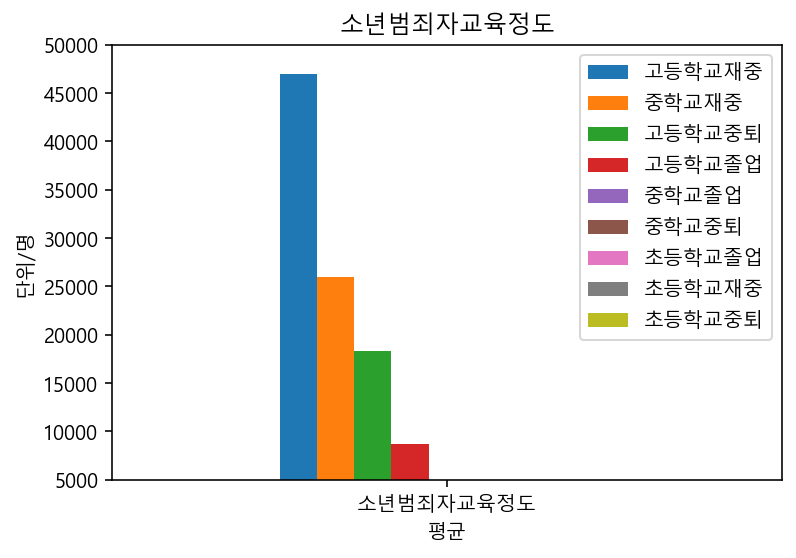

In [10]:
# 내림차순 정렬된 결과 단위/명을 5000명부터로 설정하여 상위 데이터를 시각화

db4.plot.bar(rot=0)
plt.title("소년범죄자교육정도")
plt.xlabel("평균")
plt.ylabel("단위/명")
plt.ylim(5000,50000)

###### 소년범죄자 교육 정도에 따른 분석 결과 고등학교 재학 중인 경우가 월등히 앞서있고, 중학교 재학 중, 고등학교 중퇴 순으로 나타났다. 위 결과를 좀 더 명확하게 입증 할 수 있는 유사치 데이터를 아래 다음과 같이 첨부하였다.

In [11]:
db6 = pd.read_csv('./data/01_학교생활만족도_김관회_3.csv',encoding='utf8')
db6 = db6.rename(columns=db6.iloc[0]+db6.iloc[1])
db6 = db6.drop('응답자유형별(1)응답자유형별(1)', axis=1)
db6 = db6.drop(db6.index[0:2])
db6 = db6.drop(db6.index[8:])

db6 = db6.transpose()

db6 = db6.rename(columns=db6.iloc[0])
db6 = db6.drop(db6.index[0])
db6 = db6.drop(db6.columns[[0,1,2,6,7]], axis=1)
db6

,초등학교,중학교,고등학교
친구들이 존중하고 배려한다전혀 그렇지 않다,0.9,0.4,0.6
친구들이 존중하고 배려한다그렇지 않은 편이다,5.1,2.9,2.7
친구들이 존중하고 배려한다그런 편이다,61.8,60.6,55.9
친구들이 존중하고 배려한다매우 그렇다,32.2,36.1,40.7
선생님은 학생들을 존중한다전혀 그렇지 않다,0.5,0.6,1.5
선생님은 학생들을 존중한다그렇지 않은 편이다,1.4,2.7,4.2
선생님은 학생들을 존중한다그런 편이다,34.2,54.4,56.7
선생님은 학생들을 존중한다매우 그렇다,63.8,42.3,37.6
나는 수업시간이 재밌다전혀 그렇지 않다,4.4,7.1,6.9
나는 수업시간이 재밌다그렇지 않은 편이다,18.1,25.2,24.3


In [12]:
db6['초등학교'] = db6['초등학교'].astype(float)
db6['중학교'] = db6['중학교'].astype(float)
db6['고등학교'] = db6['고등학교'].astype(float)

(0.0, 100.0)

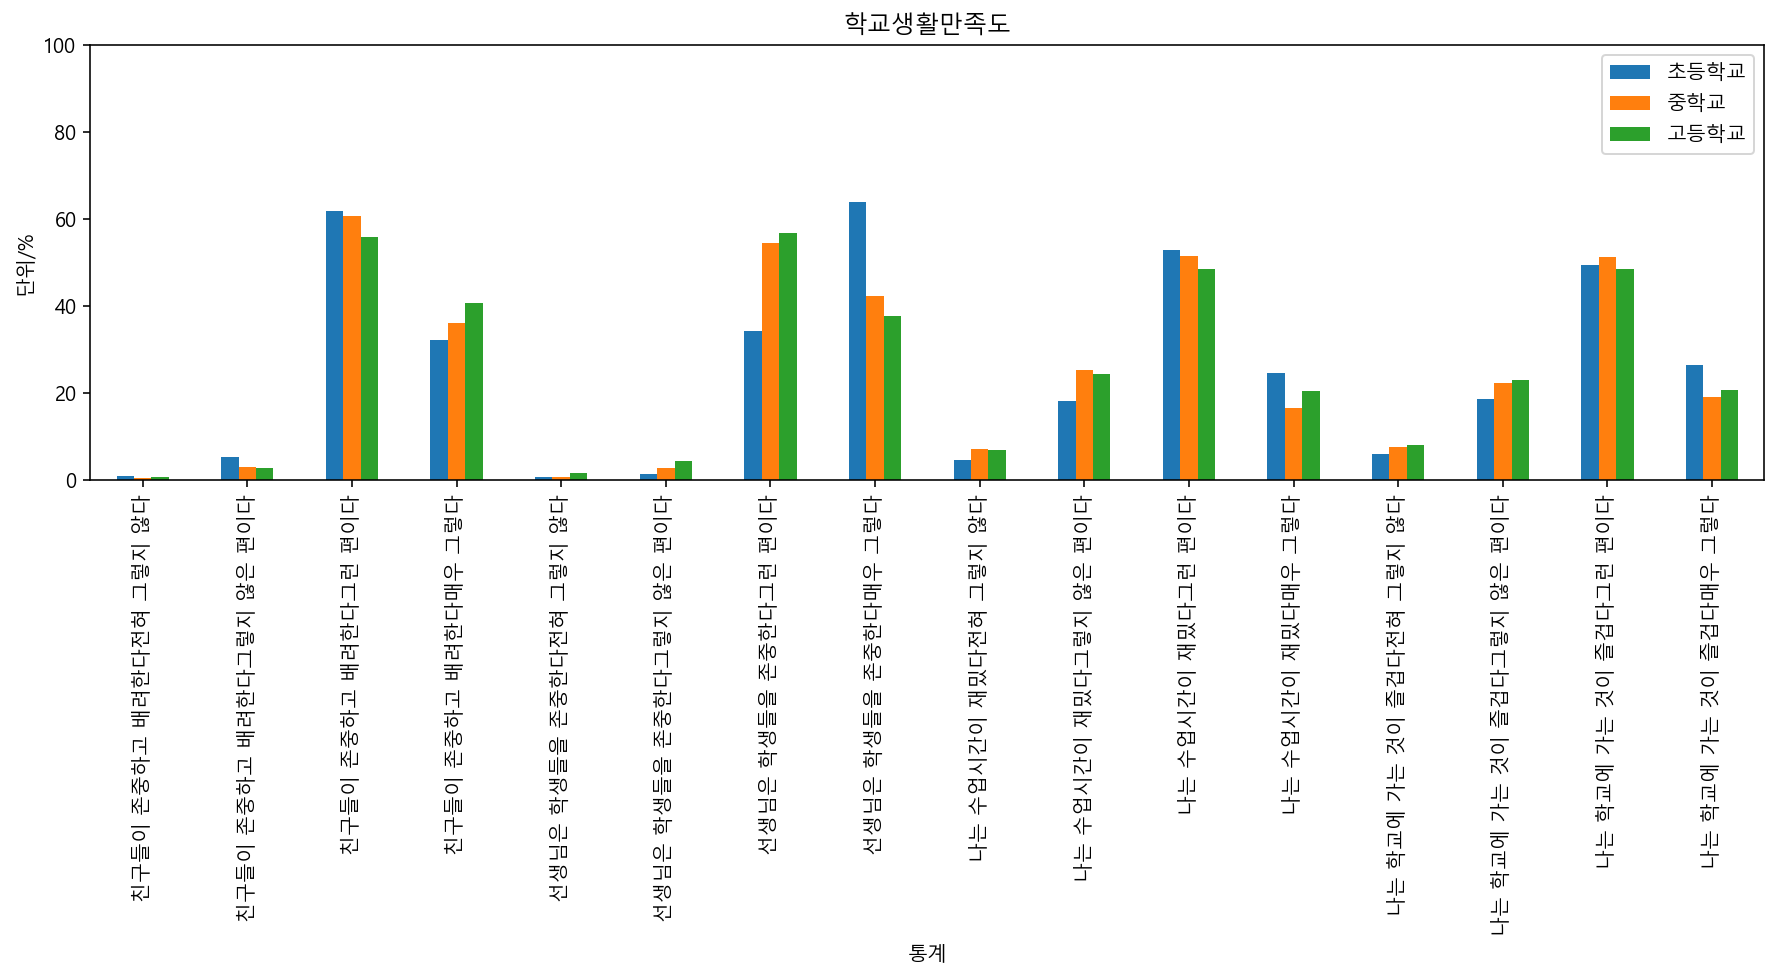

In [13]:
db6.plot.bar(figsize=(15,4))
plt.title("학교생활만족도")
plt.xlabel("통계")
plt.ylabel("단위/%")
plt.ylim(0,100)

###### 학교에 대한 부정적인 인식이 중고등학교 모두 30% 내외 상당히 높은 수치를 보여주고 있다.

In [14]:
db7 = pd.read_csv('./data/01_학업중단율_김관회_4.csv', encoding='utf8')
db7 = db7.drop(db7.columns[0], axis=1)
db7.head()

,자치구,초등학교,초등학교.1,초등학교.2,중학교,중학교.1,중학교.2,고등학교,고등학교.1,고등학교.2
0,자치구,학생수,학업중단율,중단지수,학생수,학업중단율,중단지수,학생수,학업중단율,중단지수
1,합계,"422,293","5,154",1.22,"207,413","2,414",1.16,"236,689","4,318",1.82
2,종로구,"5,463",88,1.61,"2,854",41,1.44,"9,046",190,2.1
3,중구,"5,181",108,2.08,"1,876",19,1.01,"7,058",136,1.93
4,용산구,"7,273",175,2.41,"3,583",81,2.26,"5,996",139,2.32


In [15]:
db7.columns = db7.columns+db7.iloc[0]
db7 = db7.drop(db7.index[:2])
db7 = db7.drop(db7.columns[[1,2,4,5,7,8]], axis=1)
db7.columns=['자치구','초등학교중단지수','중학교중단지수','고등학교중단지수']
db7

,자치구,초등학교중단지수,중학교중단지수,고등학교중단지수
2,종로구,1.61,1.44,2.1
3,중구,2.08,1.01,1.93
4,용산구,2.41,2.26,2.32
5,성동구,1.73,1.06,2.23
6,광진구,1.27,0.99,1.56
7,동대문구,0.89,0.8,1.97
8,중랑구,0.38,0.53,1.33
9,성북구,0.97,1.05,1.24
10,강북구,0.57,0.79,1.37
11,도봉구,0.44,0.65,1.77


In [16]:
db7['초등학교중단지수'] = db7['초등학교중단지수'].astype(float)
db7['중학교중단지수'] = db7['중학교중단지수'].astype(float)
db7['고등학교중단지수'] = db7['고등학교중단지수'].astype(float)

(0.0, 5.0)

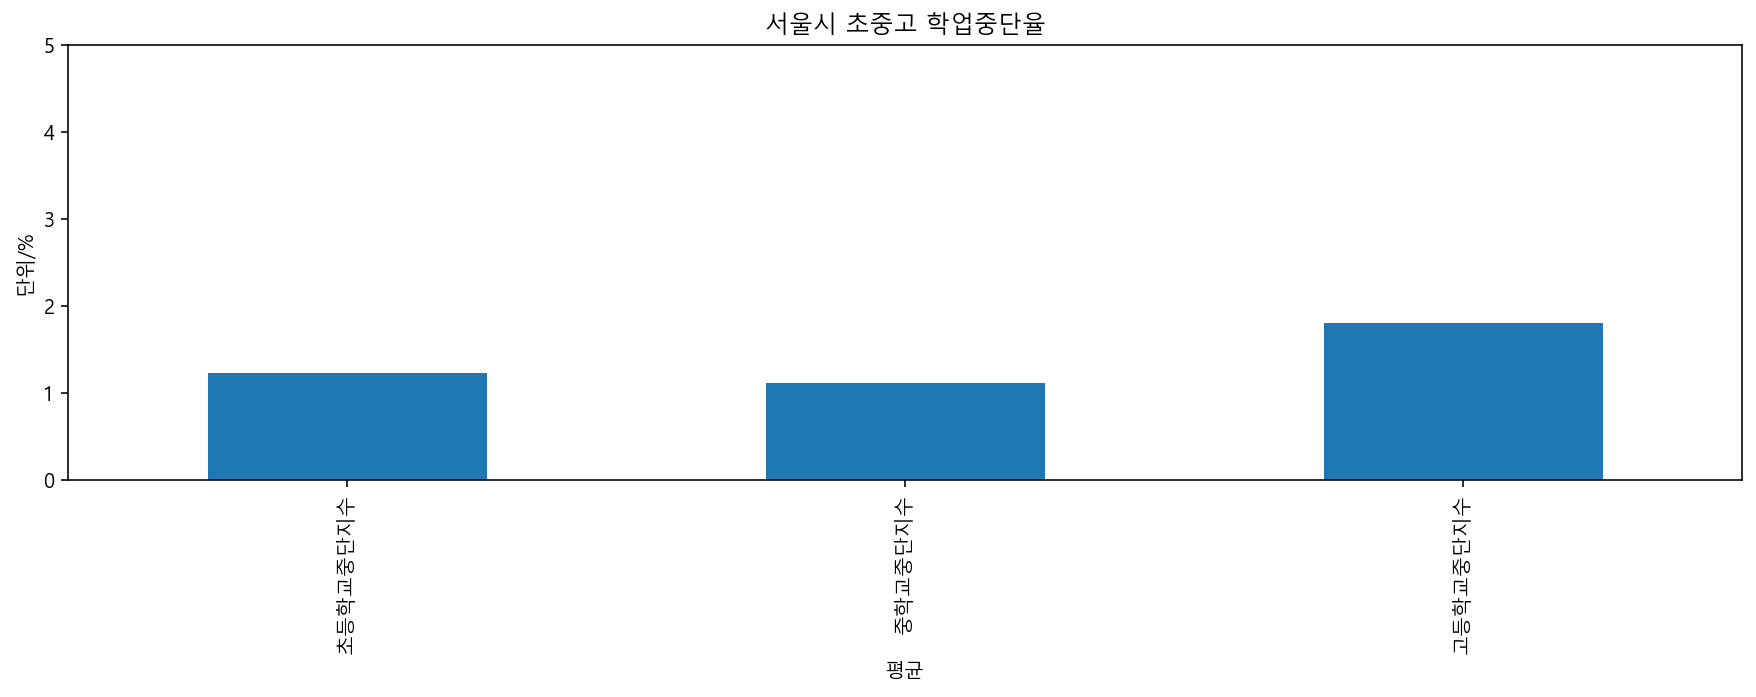

In [17]:
db7.mean().plot.bar(figsize=(15,4))
plt.title("서울시 초중고 학업중단율")
plt.xlabel("평균")
plt.ylabel("단위/%")
plt.ylim(0,5)

###### 대한민국에서 가장 인구 밀집도가 높은 서울시 10대 학업중단율 평균치를 살펴보니 고등학교때 학업을 중단하는 수치가 2%에 육박하는 상당히 높은 수치를 기록하였다.

In [18]:
db8 = pd.read_csv('./data/01_가출여부및이유_김관회_5.csv', encoding='utf8')
db8
db8 = db8.rename(columns=(db8.iloc[1]))
db8 = db8.drop(db8.index[0:2])
db8 = db8.drop(db8.columns[0], axis=1)
db8 = db8.drop(db8.index[15:])
db8 = db8.transpose()
db8 = db8.rename(columns=db8.iloc[0])
db8 = db8.drop(db8.index[0])
db8 = db8.drop(db8.columns[8:], axis=1)
db8 = db8.drop(db8.columns[0], axis=1)
db8 = db8.drop(db8.columns[[5,6]], axis=1)
db8

,남자,여자,초등학교,중학교,고등학교
가출한 적이 있다,3.3,2.5,2.3,3.1,3.2
가출한 적이 없다,96.7,97.5,97.7,96.9,96.8
학업 부담 때문에,20,21.8,28.5,24.1,13.3
부모님과의 문제,58.7,64.2,57,62.5,62
학교에서의 갈등이나 폭력 때문에,2.4,1.3,4.7,0.7,1.5
가정의 경제적인 어려움,2.9,1.5,1.9,1.5,3.3
친구들과 함께 하기 위해서,8.2,7.9,0,7.3,13.3
기타,7.8,3.3,7.9,3.9,6.5


In [19]:
db8['남자'] = db8['남자'].astype(float)
db8['여자'] = db8['여자'].astype(float)
db8['초등학교'] = db8['초등학교'].astype(float)
db8['중학교'] = db8['중학교'].astype(float)
db8['고등학교'] = db8['고등학교'].astype(float)

(0.0, 100.0)

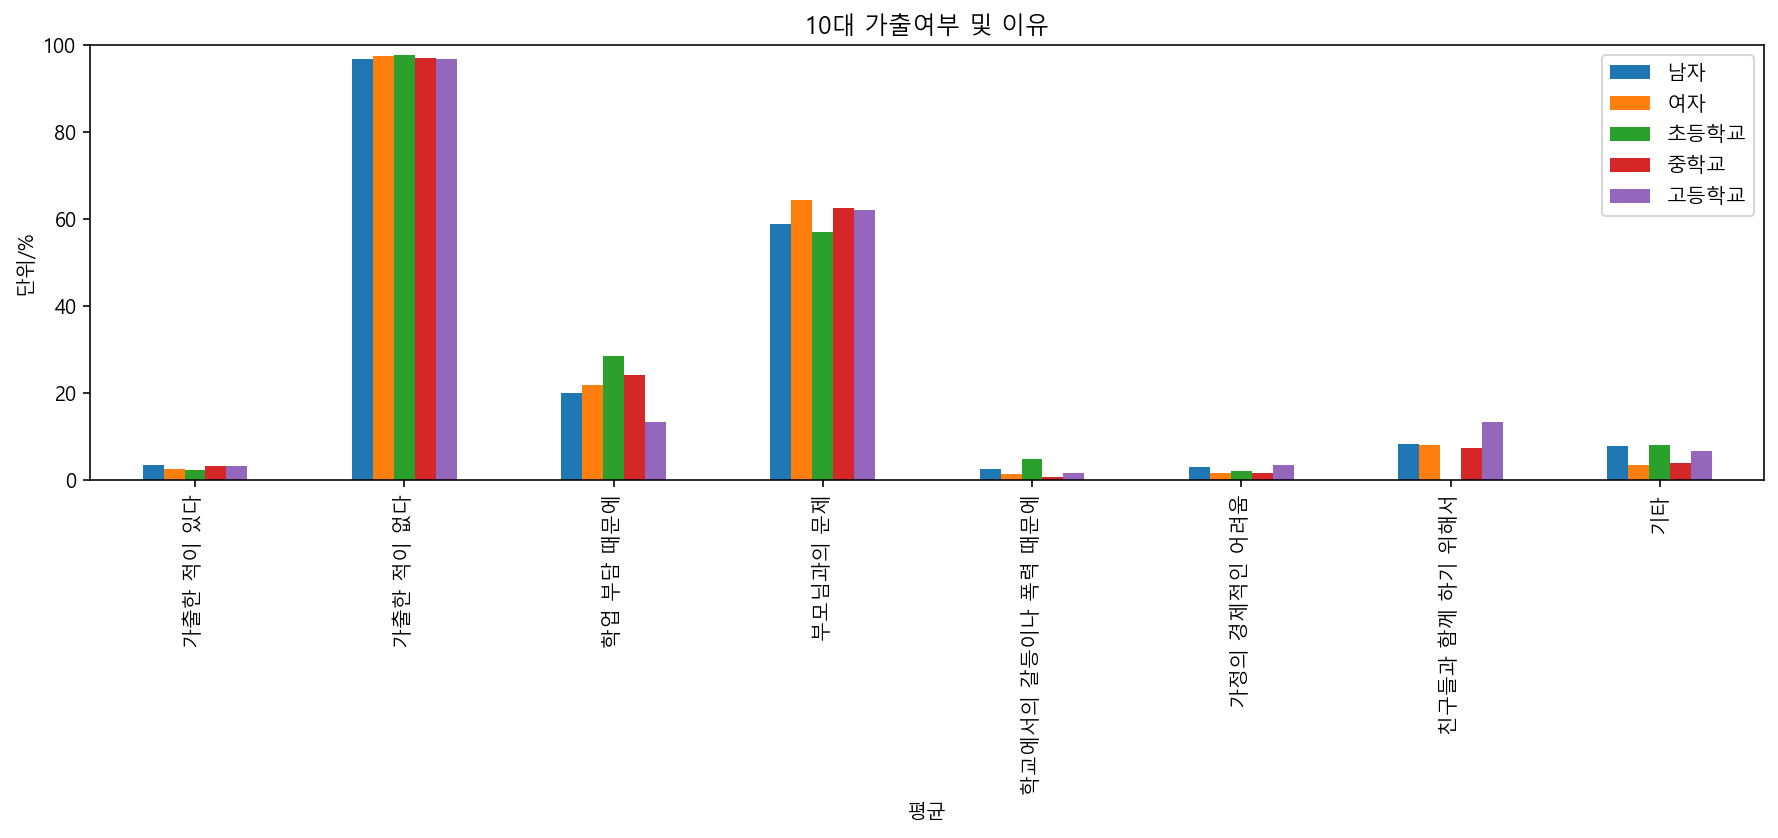

In [20]:
db8.plot.bar(figsize=(15,4))
plt.title("10대 가출여부 및 이유")
plt.xlabel("평균")
plt.ylabel("단위/%")
plt.ylim(0,100)

###### 가출해본 경험이 있다고 응답한 3%가 넘는 중고등학교 학생과 갈수록 늘어가는 소년범죄의 연관성이 전혀 없다고 단정 지을 수만은 없다.

# 

### 소년범죄가 급속히 증가하고 있는 현시점에서 하루의 시간을 학교에서 가장 많이 보내는 10대의 범죄율을 종합해 볼 때, 고등학교 재학 중에 범죄를 일으키는 경우가 가장 많은 것으로 나타났고, 그에 따른 학교생활의 만족 정도와 학업을 중도에 포기하는 비율, 그리고 가출을 경험해본 경우들을 비교하여 분석하였다.

### 분석 결과 서로 연관성이 있음을 충분히 유추할 수 있었고, 앞으로 우리는 계속 늘어나는 부정적인 수치를 지속해서 눈여겨볼 필요가 있다.